In [1]:
import matplotlib.pyplot as plt
import pandas
import csv

In [3]:
anime = pandas.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
episodes, count = 0, 0
data = []
list = [["anime_id", "name", "genre", "type", "episodes", "rating", "members", "episode_class"]]
with open('anime.csv') as f:
    reader = csv.reader(f)
    for row in reader:
      if row[3] == "TV" and row[4] != "Unknown":
        episodes += int(row[4], 10)
        count += 1
        data.append(row)

In [6]:
normal = episodes // count
eps = 12
lower_center_border = normal - eps // 4 * 3
higher_centre_border = normal + eps // 4 * 3
higgest_border = normal + eps * 9 // 4
lowest_border = normal - eps * 9 // 4

In [7]:
for i in data:
  if int(i[4]) <= lowest_border:
    i.append(0)
  elif int(i[4]) <= lower_center_border:
    i.append(1)
  elif int(i[4]) <= higher_centre_border:
    i.append(2)
  elif int(i[4]) <= higgest_border:
    i.append(3)
  else:
    i.append(4)
  list.append(i)

In [8]:
with open('data_new.csv', 'w') as f:
    writer = csv.writer(f)
    for row in list:
        writer.writerow(row)

In [9]:
anime = pandas.read_csv('data_new.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members,episode_class
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,4
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,3
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,1
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,3
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,1


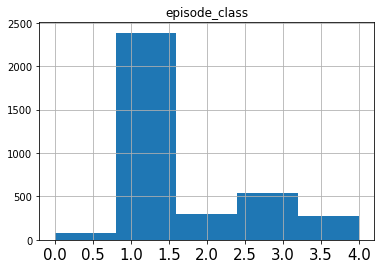

In [10]:
anime.hist(column="episode_class", bins=5, xlabelsize=15)
plt.show()